In [1]:
from qiskit.circuit import QuantumCircuit, QuantumRegister
import numpy as np

In [2]:
# Cited from problem session 2

def quantum_fourier_transform(n):
    quantum_register = QuantumRegister(size=n, name="x")
    QFT_circuit = QuantumCircuit(quantum_register, name=f"QFT")

    for q, p in zip(quantum_register[:n >> 1], reversed(quantum_register[n >> 1:])):
        QFT_circuit.swap(q, p)

    for i, q in enumerate(quantum_register, start=1):
        QFT_circuit.h(q)
        for j, p in enumerate(quantum_register[i:], start=1):
            QFT_circuit.cp(np.pi / (1 << j), q, p)

    return QFT_circuit

def inverse_quantum_fourier_transform(n):
    quantum_register = QuantumRegister(size=n, name="x")
    inverse_QFT_circuit = QuantumCircuit(quantum_register, name=f"IQFT")

    for i, q in enumerate(reversed(quantum_register), start=1):
        for j, p in enumerate(reversed(quantum_register[n + 1 - i:]), start=1):
            inverse_QFT_circuit.cp(- np.pi / (1 << (i - j)), q, p)
        inverse_QFT_circuit.h(q)

    for q, p in zip(quantum_register[:n >> 1], reversed(quantum_register[n >> 1:])):
        inverse_QFT_circuit.swap(q, p)

    return inverse_QFT_circuit

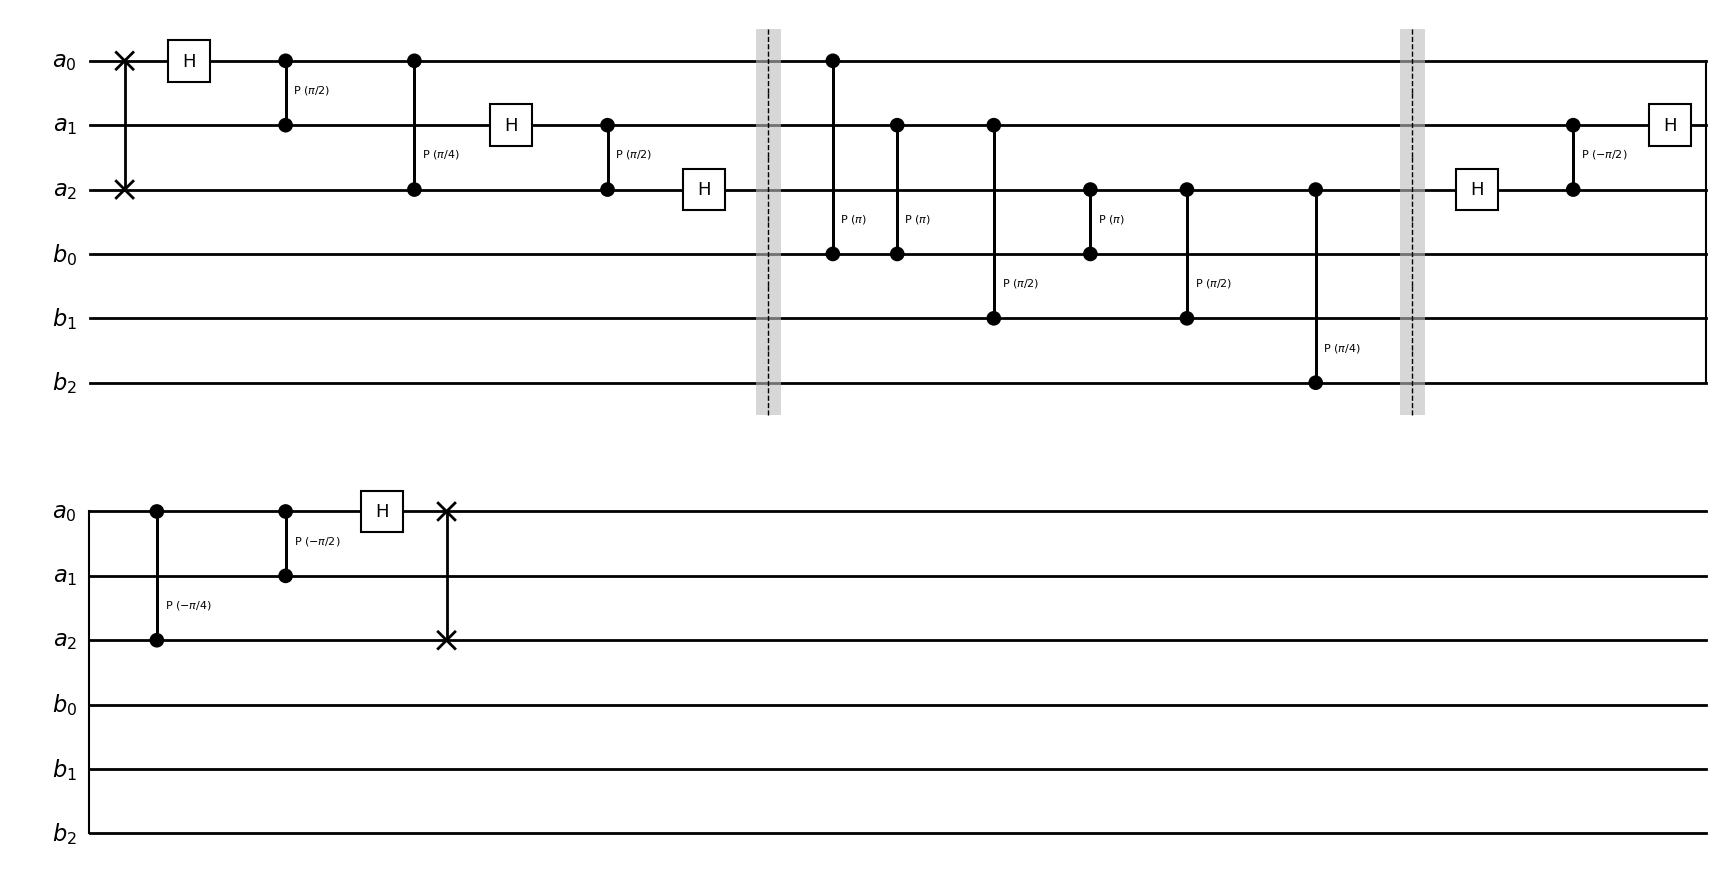

In [3]:
def addition_inplace(d):
    a = QuantumRegister(size=d, name="a")
    b = QuantumRegister(size=d, name="b")
    circ = QuantumCircuit(a, b, name=f"{d}-digit inplace adder")

    circ.compose(quantum_fourier_transform(d), qubits=range(d), inplace=True)

    circ.barrier()

    for i in range(d):
        for j in range(i+1):
            circ.cp(2*np.pi/2**(j+1), a[i], b[j])

    circ.barrier()

    circ.compose(inverse_quantum_fourier_transform(d), qubits=range(d), inplace=True)

    return circ
addition_inplace(3).draw(output="mpl", style="bw")